In [10]:
#Define Constante
DIR = "/content/drive/MyDrive/Colab Notebooks/UPM/PRDL/EDA/"

#importation
from pandas.plotting import scatter_matrix
from google.colab import drive
import os
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn import linear_model, svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import math

In [2]:
def importData():
  drive.mount("/content/drive")
  
  #Change directory
  os.chdir(DIR)

  # Read Clinical Data
  OSA_Clinical_df = pd.read_csv("OSA_DB_UPM_Clinical.csv",sep=';',na_values=['-1'])
  OSA_Clinical_df=OSA_Clinical_df.dropna()

  # Now Read Demographical Information
  OSA_Demo_df = pd.read_csv("OSA_DB_UPM_Age_Gender.csv",na_values=['-1'])
  OSA_Demo_df=OSA_Demo_df.dropna()

  # JOIN OSA_Demo_df and OSA_Clinical_df
  OSA_df = pd.merge(OSA_Clinical_df, OSA_Demo_df, on='ID', how='inner')

  OSA_df['ID'] = OSA_df['ID'].astype('str')
  OSA_df = OSA_df.set_index('ID')
  return OSA_df

In [9]:
def splitData(dataSet):
  # Splitting into train and test sets

  # Generate the training set.  Set random_state to be able to replicate results.
  train = dataSet.sample(frac=0.8, random_state=1)

  # Select anything not in the training set and put it in the testing set.
  test = dataSet.loc[~dataSet.index.isin(train.index)]

  # Print the shapes of both sets.
  #print(train.shape)
  #print(test.shape)
  
  return train, test

In [8]:
def model_training(model, features, output):
  # Fit the model to the training data.
  Trained_model=model.fit(features, output)
  return Trained_model

In [7]:
def model_testing(model, features, output):
  ### Predicting Error

  # Generate our predictions for the test set.
  predictions = model.predict(features)

  # Compute error between our test predictions and the actual values.
  MSE=mean_squared_error(predictions, output)
  r2_s = r2_score(output, predictions)
                  
  print('Mean squared Error: ', MSE, ' R =  ', r2_s)

  # Explained variance score:
  #print('Variance score: %.2f' % r2_score(output, predictions))

  # Plot outputs
  plt.scatter(output, predictions,  color='red')
  plt.show()

In [6]:
def training_process(model, predictors, target, data):
  print("Model : ", type(model))
  print('Predictor : ', predictors)
  print("Target : ", target)
  #Split Date into Training and testing dataset, Train and Test the model on those
  train, test = splitData(data)
  model = model_training(model, train[predictors], train[target])
  model_testing(model, test[predictors], test[target])

In [22]:
df = importData()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
df.head(5)

,IAH,Weight,Height,Cervical,Gender,Age
ID,,,,,,
2,29.6,119.0,174.0,48.0,0,56.0
4,19.7,78.0,168.0,42.0,0,39.0
5,9.0,80.0,173.0,40.0,0,32.0
6,2.0,109.0,190.0,42.0,0,32.0
7,34.0,86.0,169.0,42.0,0,39.0


In [24]:
df['Gender'].value_counts()

0    428
1    171
Name: Gender, dtype: int64

### We will begin considering only the male subjets


In [25]:
df_OSA_male = df.loc[df['Gender'] == 0]

In [26]:
df_OSA_male.describe()

,IAH,Weight,Height,Cervical,Gender,Age
count,428.000000,428.000000,428.000000,428.000000,428.0,428.000000
mean,22.367196,91.579439,175.231308,42.151869,0.0,48.796729
std,18.122430,17.319852,7.192909,3.225022,0.0,12.555200
min,0.000000,61.000000,152.000000,34.000000,0.0,20.000000
25%,8.700000,80.000000,170.000000,40.000000,0.0,39.000000
50%,17.200000,88.500000,175.000000,42.000000,0.0,48.000000
75%,32.625000,100.000000,180.000000,44.000000,0.0,58.000000
max,102.000000,162.000000,197.000000,53.000000,0.0,85.000000


## We add column to tag three clases:
* ####     Healthy (IAH <= 10)
* ####     Mild (10<IAH<30)
* ####     Severe (IAH >=30)

In [27]:
conditions = [
    (df_OSA_male['IAH'] <= 10),
    (df_OSA_male['IAH'] > 10) & (df_OSA_male['IAH'] < 30),
    (df_OSA_male['IAH'] >= 30)
    ]

In [28]:
# create a list of the values we want to assign for each condition
values = ['Healthy', 'Mild', 'Severe']

In [29]:
# create a new column and use np.select to assign values to it using our lists as arguments
# NOTE: we use select() from numpy

import numpy as np

df_OSA_male['OSA'] = np.select(conditions, values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [30]:
df_OSA_male.head(10)

,IAH,Weight,Height,Cervical,Gender,Age,OSA
ID,,,,,,,
2,29.6,119.0,174.0,48.0,0,56.0,Mild
4,19.7,78.0,168.0,42.0,0,39.0,Mild
5,9.0,80.0,173.0,40.0,0,32.0,Healthy
6,2.0,109.0,190.0,42.0,0,32.0,Healthy
7,34.0,86.0,169.0,42.0,0,39.0,Severe
8,60.0,145.0,172.0,44.0,0,47.0,Severe
9,22.0,72.0,165.0,42.0,0,40.0,Mild
10,11.0,80.0,180.0,38.0,0,28.0,Mild
13,3.7,90.0,180.0,40.0,0,36.0,Healthy


## Select only Severe and Healthy cases

In [31]:
df_OSA_male_extreme = df_OSA_male.loc[df_OSA_male['OSA'] != 'Mild']

In [32]:
df_OSA_male_extreme.head(10)

,IAH,Weight,Height,Cervical,Gender,Age,OSA
ID,,,,,,,
5,9.0,80.0,173.0,40.0,0,32.0,Healthy
6,2.0,109.0,190.0,42.0,0,32.0,Healthy
7,34.0,86.0,169.0,42.0,0,39.0,Severe
8,60.0,145.0,172.0,44.0,0,47.0,Severe
13,3.7,90.0,180.0,40.0,0,36.0,Healthy
20,4.3,89.0,171.0,45.0,0,44.0,Healthy
22,56.0,113.0,177.0,46.0,0,33.0,Severe
24,53.6,107.0,170.0,46.0,0,48.0,Severe
25,2.1,70.0,174.0,38.0,0,53.0,Healthy


## Now add BMI feature

In [33]:
df_OSA_male_extreme['BMI'] = \
        df_OSA_male_extreme['Weight'] / (df_OSA_male_extreme['Height']/100.0)**2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
df_OSA_male_extreme.head(10)

,IAH,Weight,Height,Cervical,Gender,Age,OSA,BMI
ID,,,,,,,,
5,9.0,80.0,173.0,40.0,0,32.0,Healthy,26.729927
6,2.0,109.0,190.0,42.0,0,32.0,Healthy,30.193906
7,34.0,86.0,169.0,42.0,0,39.0,Severe,30.110991
8,60.0,145.0,172.0,44.0,0,47.0,Severe,49.012980
13,3.7,90.0,180.0,40.0,0,36.0,Healthy,27.777778
20,4.3,89.0,171.0,45.0,0,44.0,Healthy,30.436716
22,56.0,113.0,177.0,46.0,0,33.0,Severe,36.068818
24,53.6,107.0,170.0,46.0,0,48.0,Severe,37.024221
25,2.1,70.0,174.0,38.0,0,53.0,Healthy,23.120624


In [36]:
df_OSA_male_extreme.groupby('OSA').describe()

IAH                        ...        BMI                      
         count       mean        std  ...        50%        75%        max
OSA                                   ...                                 
Healthy  132.0   5.046970   3.065305  ...  26.868063  30.096999  43.428571
Severe   128.0  45.053594  14.186095  ...  30.985601  35.093804  52.298554

[2 rows x 56 columns]

OSA
Healthy    AxesSubplot(0.125,0.125;0.775x0.755)
Severe     AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

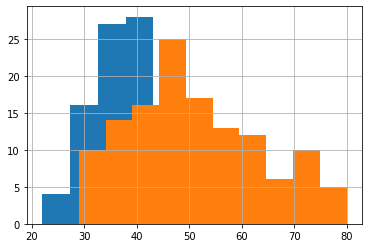

In [39]:
df_OSA_male_extreme.groupby('OSA')['Age'].hist()

In [ ]:
from scipy import stats

group1 = df_OSA_male_extreme.where(df_OSA_male_extreme.OSA== 'Healthy').dropna()['Age']
group2 = df_OSA_male_extreme.where(df_OSA_male_extreme.OSA== 'Severe').dropna()['Age']


In [ ]:
stats.ttest_ind(group1,group2)

Ttest_indResult(statistic=-5.122076517455765, pvalue=5.681249768299164e-07)

In [ ]:
stats.mannwhitneyu(group1,group2)

MannwhitneyuResult(statistic=6365.5, pvalue=4.4396124914521145e-07)